# CDC COVID-19 Data Analysis for Italy - 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading in Data

In [2]:
df = pd.read_csv('covid19_italy_region.csv')

In [3]:
df.head(3)

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN


In [4]:
df['RegionName'] = df['RegionName'].astype('str')

In [5]:
df.shape


(4242, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SNo                        4242 non-null   int64  
 1   Date                       4242 non-null   object 
 2   Country                    4242 non-null   object 
 3   RegionCode                 4242 non-null   int64  
 4   RegionName                 4242 non-null   object 
 5   Latitude                   4242 non-null   float64
 6   Longitude                  4242 non-null   float64
 7   HospitalizedPatients       4242 non-null   int64  
 8   IntensiveCarePatients      4242 non-null   int64  
 9   TotalHospitalizedPatients  4242 non-null   int64  
 10  HomeConfinement            4242 non-null   int64  
 11  CurrentPositiveCases       4242 non-null   int64  
 12  NewPositiveCases           4242 non-null   int64  
 13  Recovered                  4242 non-null   int64

In [7]:
df.isna().sum()

SNo                             0
Date                            0
Country                         0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

In [8]:
df.head(3)

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN


In [9]:
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [10]:
df.head(3)

,SNo,Date,Country,RegionCode,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,0,0,0,0,0,0,0,0,0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SNo                        4242 non-null   int64  
 1   Date                       4242 non-null   object 
 2   Country                    4242 non-null   object 
 3   RegionCode                 4242 non-null   int64  
 4   RegionName                 4242 non-null   object 
 5   HospitalizedPatients       4242 non-null   int64  
 6   IntensiveCarePatients      4242 non-null   int64  
 7   TotalHospitalizedPatients  4242 non-null   int64  
 8   HomeConfinement            4242 non-null   int64  
 9   CurrentPositiveCases       4242 non-null   int64  
 10  NewPositiveCases           4242 non-null   int64  
 11  Recovered                  4242 non-null   int64  
 12  Deaths                     4242 non-null   int64  
 13  TotalPositiveCases         4242 non-null   int64

In [12]:
df.describe()

,SNo,RegionCode,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,4242.00000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,3.087000e+03
mean,2120.50000,11.857143,319.249646,38.119283,361.776285,1430.788779,1772.968647,57.402640,5894.011080,1215.227016,8825.614097,1.551357e+05
std,1224.70425,6.274538,809.580658,91.086247,909.972787,3180.448790,3964.623146,131.220899,12257.464218,3006.828585,17493.402393,1.686290e+05
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-229.000000,0.000000,0.000000,0.000000,3.482000e+03
25%,1060.25000,7.000000,9.000000,0.000000,10.000000,77.000000,93.000000,2.000000,359.000000,76.000000,1156.000000,4.801250e+04
50%,2120.50000,12.000000,49.000000,5.000000,55.000000,350.000000,407.000000,11.000000,1589.500000,292.000000,3257.500000,9.265300e+04
75%,3180.75000,17.000000,211.000000,26.000000,234.750000,1337.000000,1595.250000,53.000000,4586.250000,927.750000,7713.500000,2.043725e+05
max,4241.00000,22.000000,10342.000000,1093.000000,10656.000000,30382.000000,37307.000000,2380.000000,77611.000000,16896.000000,103074.000000,1.120531e+06


In [13]:
df.head(3)

,SNo,Date,Country,RegionCode,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,0,0,0,0,0,0,0,0,0,NaN


In [14]:
import seaborn as sns

### Data Cleaning (Wrangling)

In [15]:
df.isna().sum()

SNo                             0
Date                            0
Country                         0
RegionCode                      0
RegionName                      0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

In [16]:
## Call out all the NAN in TestsPerformed
df.iloc[:, 14:15].isna()

,TestsPerformed
0,True
1,True
2,True
3,True
4,True
...,...
4237,False
4238,False
4239,False
4240,False


In [17]:
df.loc[0, 'TestsPerformed'] = 0

In [18]:
## Fill up all NAN with values before it
df['TestsPerformed'] = df['TestsPerformed'].fillna(method='ffill')

In [19]:
df.head(3)

,SNo,Date,Country,RegionCode,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,0,0,0,0,0,0,0,0,0,0.0
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,0,0,0,0,0,0,0,0,0,0.0
2,2,2020-02-24T18:00:00,ITA,18,Calabria,0,0,0,0,0,0,0,0,0,0.0


## Converting the Date type from object to datetime structure

In [20]:

df['Date'] = pd.to_datetime(df['Date'])

In [21]:
##df.isna().sum()
df.dtypes

SNo                                   int64
Date                         datetime64[ns]
Country                              object
RegionCode                            int64
RegionName                           object
HospitalizedPatients                  int64
IntensiveCarePatients                 int64
TotalHospitalizedPatients             int64
HomeConfinement                       int64
CurrentPositiveCases                  int64
NewPositiveCases                      int64
Recovered                             int64
Deaths                                int64
TotalPositiveCases                    int64
TestsPerformed                      float64
dtype: object

### Data Summary

In [22]:
HospitalizedPatients = df.HospitalizedPatients.sum()
IntensiveCarePatients = df.IntensiveCarePatients.sum()
IntensiveCarePatients

161702

In [23]:
gd = pd.DataFrame(df.iloc[:, :].sum(), columns = ['Total'])
gd

,Total
SNo,8995161
Country,ITAITAITAITAITAITAITAITAITAITAITAITAITAITAITAI...
RegionCode,50298
RegionName,AbruzzoBasilicataCalabriaCampaniaEmilia-Romagn...
HospitalizedPatients,1354257
IntensiveCarePatients,161702
TotalHospitalizedPatients,1534655
HomeConfinement,6069406
CurrentPositiveCases,7520933
NewPositiveCases,243502


In [24]:
### Death rate in italy
death_rate = df.Deaths.sum() / df.TotalPositiveCases.sum()
death_rate = int(death_rate * 100)
print(f'The death rate in Italy is {death_rate}%')

The death rate in Italy is 13%


In [25]:
df.dtypes

SNo                                   int64
Date                         datetime64[ns]
Country                              object
RegionCode                            int64
RegionName                           object
HospitalizedPatients                  int64
IntensiveCarePatients                 int64
TotalHospitalizedPatients             int64
HomeConfinement                       int64
CurrentPositiveCases                  int64
NewPositiveCases                      int64
Recovered                             int64
Deaths                                int64
TotalPositiveCases                    int64
TestsPerformed                      float64
dtype: object

In [26]:
df.head(4)

,SNo,Date,Country,RegionCode,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24 18:00:00,ITA,13,Abruzzo,0,0,0,0,0,0,0,0,0,0.0
1,1,2020-02-24 18:00:00,ITA,17,Basilicata,0,0,0,0,0,0,0,0,0,0.0
2,2,2020-02-24 18:00:00,ITA,18,Calabria,0,0,0,0,0,0,0,0,0,0.0
3,3,2020-02-24 18:00:00,ITA,15,Campania,0,0,0,0,0,0,0,0,0,0.0


### Calling out according to their date 

In [27]:
df['DeathRate'] = (df['Deaths'] / df['TotalPositiveCases']) * 100
df['DeathRate'] = df['DeathRate'].round(1)
df['Day'] = pd.DatetimeIndex(df.Date).day
df['Week'] = pd.DatetimeIndex(df.Date).week
df['Month'] = pd.DatetimeIndex(df.Date).month
df['Year'] = pd.DatetimeIndex(df.Date).year

In [28]:
df.head(5)

,SNo,Date,Country,RegionCode,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed,DeathRate,Day,Week,Month,Year
0,0,2020-02-24 18:00:00,ITA,13,Abruzzo,0,0,0,0,0,0,0,0,0,0.0,NaN,24,9,2,2020
1,1,2020-02-24 18:00:00,ITA,17,Basilicata,0,0,0,0,0,0,0,0,0,0.0,NaN,24,9,2,2020
2,2,2020-02-24 18:00:00,ITA,18,Calabria,0,0,0,0,0,0,0,0,0,0.0,NaN,24,9,2,2020
3,3,2020-02-24 18:00:00,ITA,15,Campania,0,0,0,0,0,0,0,0,0,0.0,NaN,24,9,2,2020
4,4,2020-02-24 18:00:00,ITA,8,Emilia-Romagna,10,2,12,6,18,18,0,0,18,0.0,0.0,24,9,2,2020


In [29]:
df_may = df[df.Month == 5]
pd.DataFrame(df_may.sum())

,0
SNo,1127532
Country,ITAITAITAITAITAITAITAITAITAITAITAITAITAITAITAI...
RegionCode,7719
RegionName,AbruzzoBasilicataCalabriaCampaniaEmilia-Romagn...
HospitalizedPatients,356551
IntensiveCarePatients,27358
TotalHospitalizedPatients,383909
HomeConfinement,1851121
CurrentPositiveCases,2235030
NewPositiveCases,27556


### GROUPING DATA FOR VISUALIZATION

### Group by Region

In [30]:
region = df.groupby('RegionName').sum()
region.iloc[:, 2:12].head(2)

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
RegionName,,,,,,,,,,
Abruzzo,23972,2748,26720,113783,140503,4000,329558,67485,537546,9937624.0
Basilicata,3003,586,3589,13286,16875,615,49278,4292,70445,5391884.0


##### Exploring Lombardia DataeSet
The Data set for Lombardia is extremely high, we need to call it out for proper exploration

In [31]:
lombardia = df[df.RegionName == 'Lombardia']
lombardia.head(5)

,SNo,Date,Country,RegionCode,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed,DeathRate,Day,Week,Month,Year
8,8,2020-02-24 18:00:00,ITA,3,Lombardia,7,9,9,7,11,12,0,6,13,0.0,46.2,24,9,2,2020
29,29,2020-02-25 18:00:00,ITA,3,Lombardia,8,9,1,12,12,6,0,9,12,0.0,75.0,25,9,2,2020
50,50,2020-02-26 18:00:00,ITA,3,Lombardia,32,13,10,14,24,18,0,9,25,0.0,36.0,26,9,2,2020
71,71,2020-02-27 18:00:00,ITA,3,Lombardia,17,41,21,13,35,14,40,14,40,0.0,35.0,27,9,2,2020
92,92,2020-02-28 18:00:00,ITA,3,Lombardia,23,47,28,19,47,12,40,17,53,0.0,32.1,28,9,2,2020



#### Visual Exploration of DataSet by Region

In [32]:
import matplotlib

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (22, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

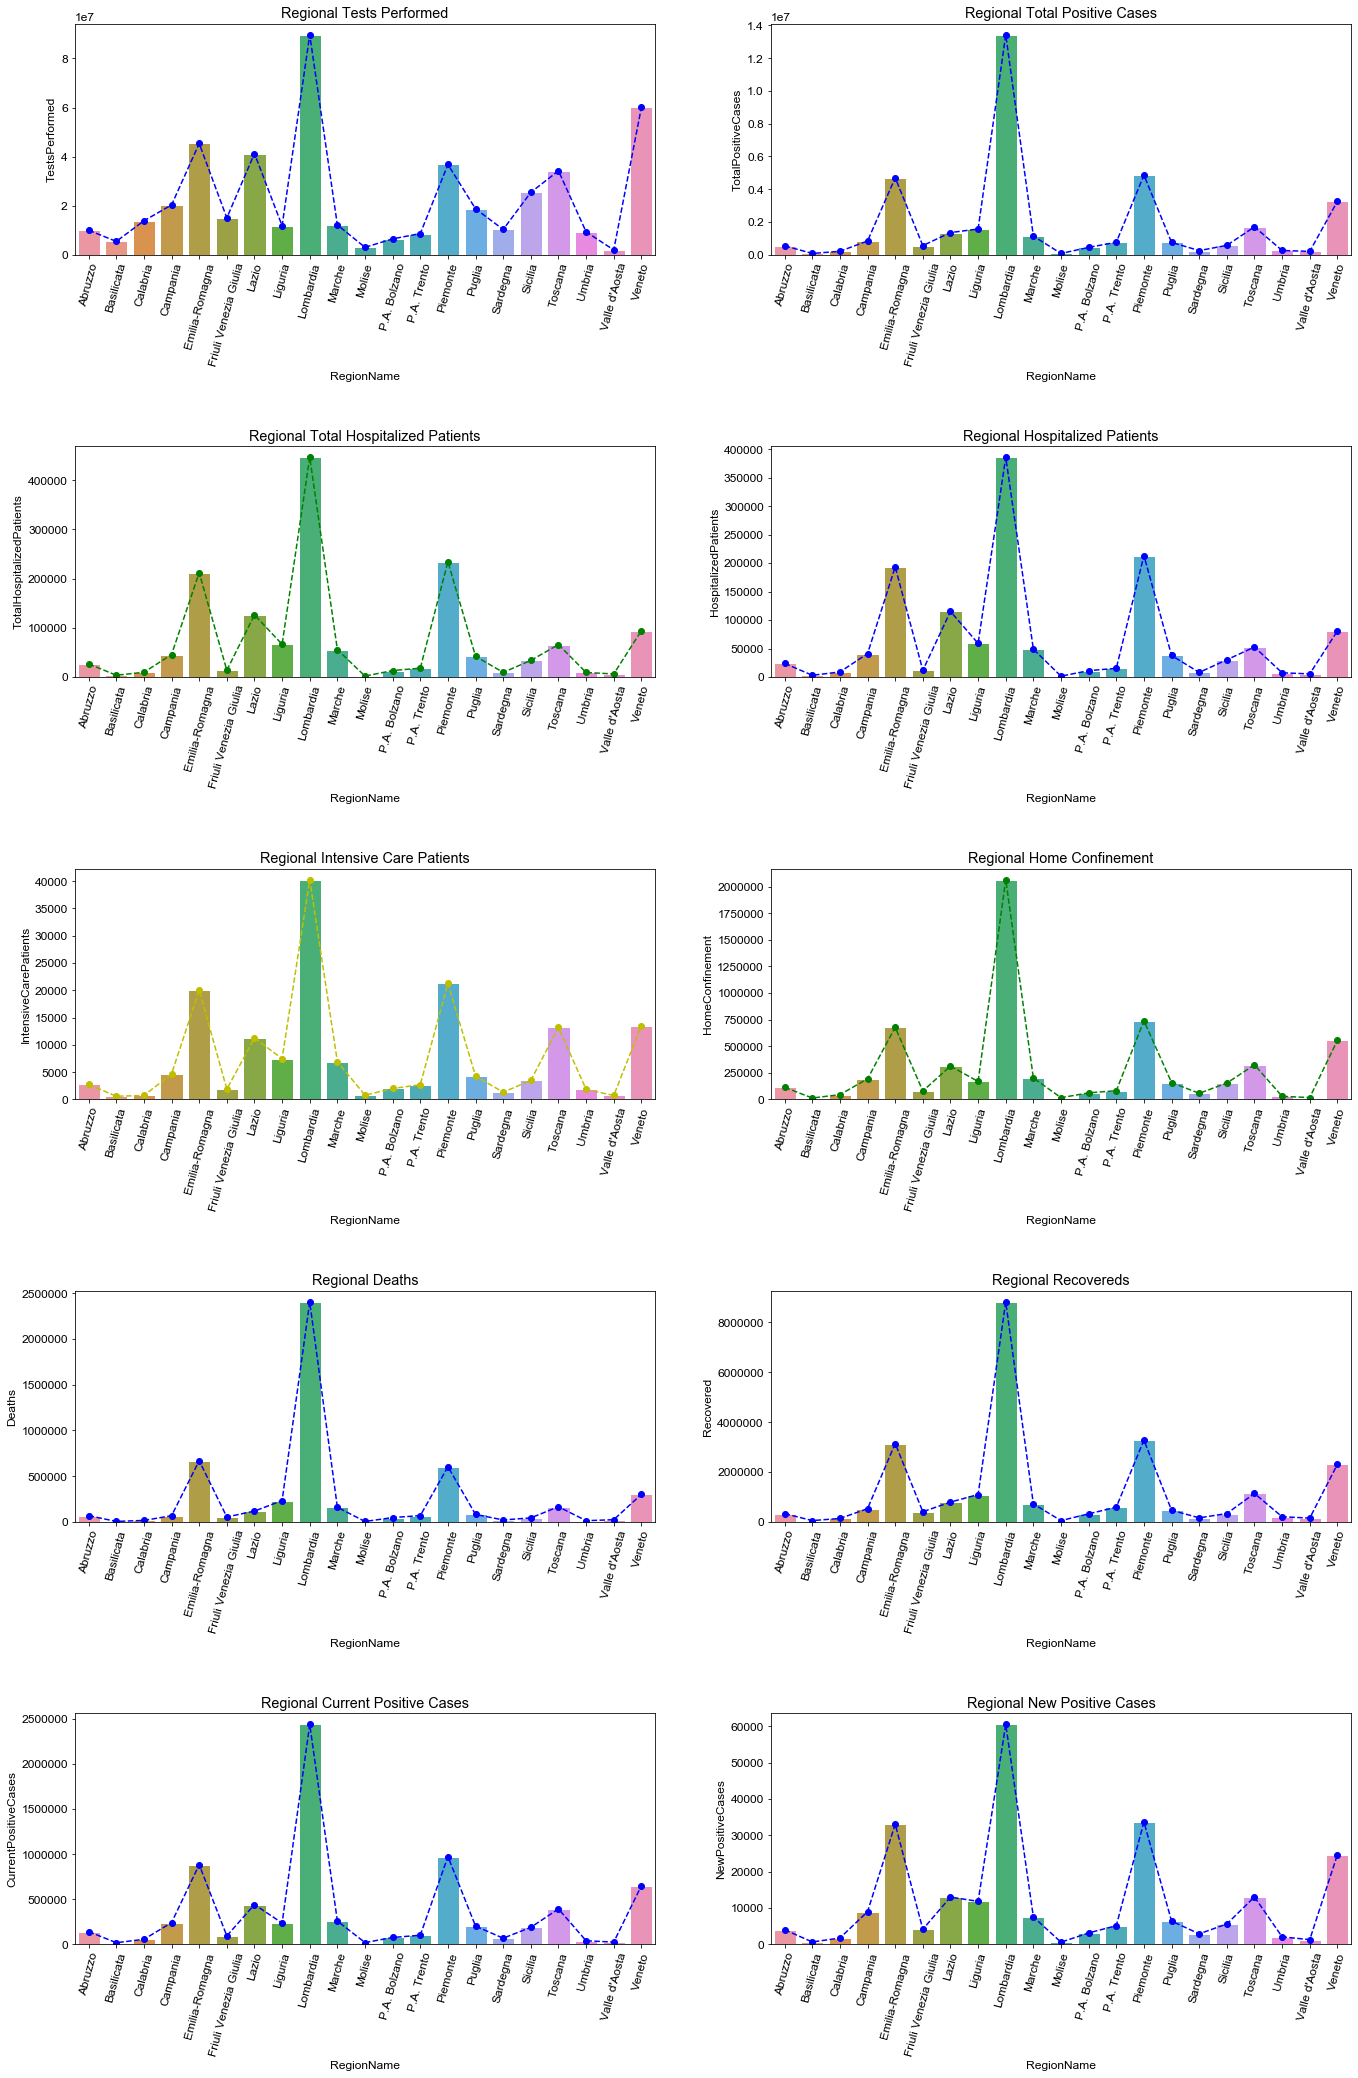

In [33]:
fig, axs = plt.subplots(5, 2, figsize=(20, 30))
sns.set_style('darkgrid')

axs[0,0].set_title('Regional Tests Performed')
axs[0,0].plot(region['TestsPerformed'], 'o--b')
g = sns.barplot(region.index, y='TestsPerformed', data=region, ax=axs[0,0])
g.set_xticklabels(g.get_xticklabels(), rotation=75)

axs[0,1].set_title('Regional Total Positive Cases')
axs[0,1].plot(region['TotalPositiveCases'], 'o--b')
g = sns.barplot(region.index, y='TotalPositiveCases', data=region, ax=axs[0,1])
g.set_xticklabels(g.get_xticklabels(), rotation=75)

axs[1,0].set_title('Regional Total Hospitalized Patients')
axs[1,0].plot(region['TotalHospitalizedPatients'], 'o--g')
g = sns.barplot(region.index, y='TotalHospitalizedPatients', data=region, ax=axs[1,0])
g.set_xticklabels(g.get_xticklabels(), rotation=75)

axs[1,1].set_title('Regional Hospitalized Patients')
axs[1,1].plot(region['HospitalizedPatients'], 'o--b')
g = sns.barplot(region.index, y='HospitalizedPatients', data=region, ax=axs[1,1])
g.set_xticklabels(g.get_xticklabels(), rotation=75)

axs[2,0].set_title('Regional Intensive Care Patients')
axs[2,0].plot(region['IntensiveCarePatients'], 'o--y')
g = sns.barplot(region.index, y='IntensiveCarePatients', data=region, ax=axs[2,0])
g.set_xticklabels(g.get_xticklabels(), rotation=75)

axs[2,1].set_title('Regional Home Confinement')
axs[2,1].plot(region['HomeConfinement'], 'o--g')
g = sns.barplot(region.index, y='HomeConfinement', data=region, ax=axs[2,1])
g.set_xticklabels(g.get_xticklabels(), rotation=75)

axs[3,0].set_title('Regional Deaths')
axs[3,0].plot(region['Deaths'], 'o--b')
g = sns.barplot(region.index, y='Deaths', data=region, ax=axs[3,0])
g.set_xticklabels(g.get_xticklabels(), rotation=75)

axs[3,1].set_title('Regional Recovereds')
axs[3,1].plot(region['Recovered'], 'o--b')
g = sns.barplot(region.index, y='Recovered', data=region, ax=axs[3,1])
g.set_xticklabels(g.get_xticklabels(), rotation=75)

axs[4,0].set_title('Regional Current Positive Cases')
axs[4,0].plot(region['CurrentPositiveCases'], 'o--b')
g = sns.barplot(region.index, y='CurrentPositiveCases', data=region, ax=axs[4,0])
g.set_xticklabels(g.get_xticklabels(), rotation=75)

axs[4,1].set_title('Regional New Positive Cases')
axs[4,1].plot(region['NewPositiveCases'], 'o--b')
g = sns.barplot(region.index, y='NewPositiveCases', data=region, ax=axs[4,1])
g.set_xticklabels(g.get_xticklabels(), rotation=75)

plt.tight_layout(pad=4);

### Rate of Death per Region
This is to determine the death rate by region

In [34]:
region['DeathRate'] = (region['Deaths'] / region['TotalPositiveCases']) * 100
region['DeathRate'] = region['DeathRate'].round(2)
region.iloc[:, 12:13].head(3)

,DeathRate
RegionName,
Abruzzo,12.55
Basilicata,6.09
Calabria,7.47


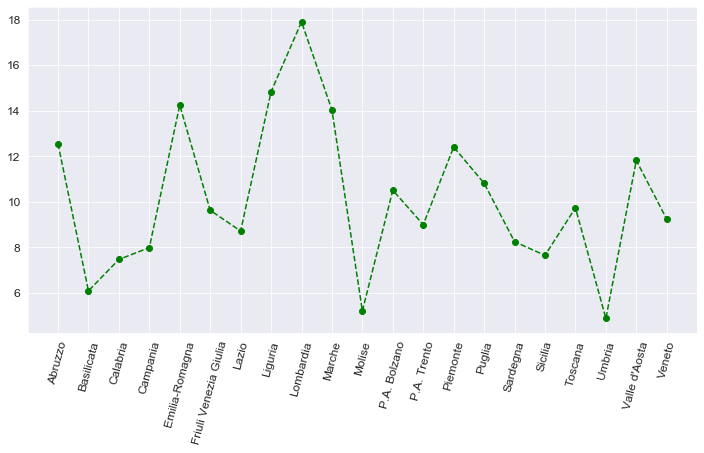

In [53]:
plt.figure(figsize = (12, 6))
plt.plot(region['DeathRate'], 'o--g')
plt.xticks(region['DeathRate'].index, rotation=75);

#plt.figure(figsize = (12, 6))
#g = sns.barplot(region.index, y='DeathRate', data=region)
#g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Group by days

In [36]:
df_day = df.groupby('Day').sum()
df_day.iloc[:, 2:12].head()

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Day,,,,,,,,,,
1,45354,5318,51601,205998,257641,7652,842424,173325,1270250,16451945.0
2,45163,5299,51422,208028,259280,7794,846172,174676,1278915,16628629.0
3,45254,5240,51355,210413,261815,7317,852956,174751,1287466,16776060.0
4,44985,5159,51094,213492,264444,7598,857577,175780,1286629,16951505.0
5,44239,5107,50176,215751,265742,7448,863595,176699,1294756,17144728.0


#### Visual Exploration of DataSet by Day Recording

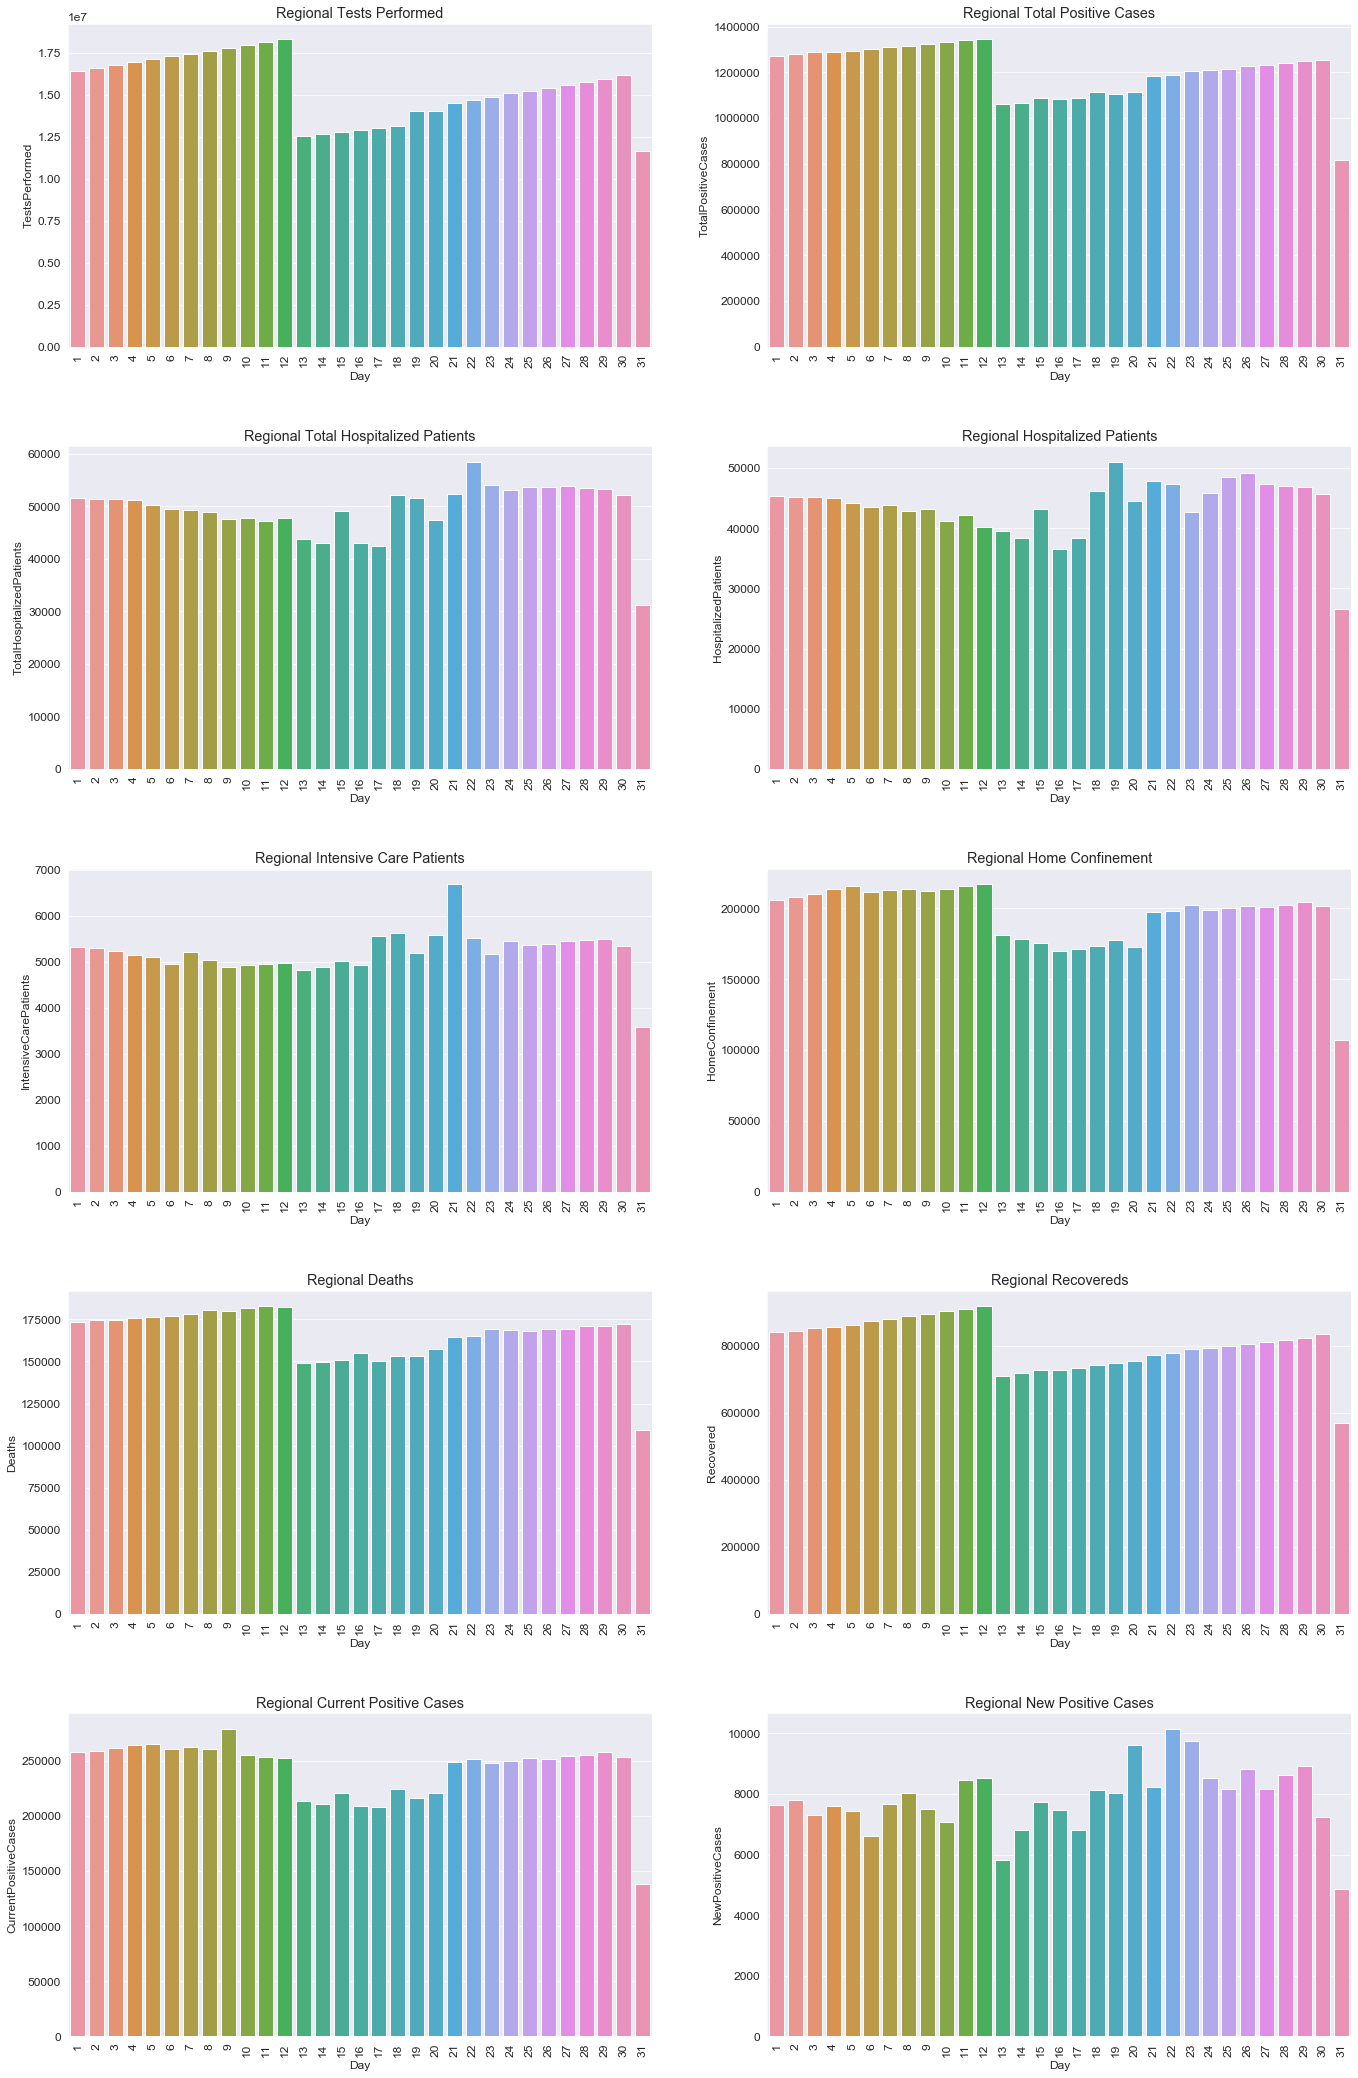

In [37]:
fig, axs = plt.subplots(5, 2, figsize=(20, 30))
sns.set_style('darkgrid')

axs[0,0].set_title('Regional Tests Performed')
#axs[0,0].plot(df_day['TestsPerformed'], 'o--b')
#plt.xticks(df_day['TestsPerformed'].index, rotation='vertical');
g = sns.barplot(df_day.index, y='TestsPerformed', data=df_day, ax=axs[0,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[0,1].set_title('Regional Total Positive Cases')
#axs[0,1].plot(df_day['TotalPositiveCases'], 'o--b')
g = sns.barplot(df_day.index, y='TotalPositiveCases', data=df_day, ax=axs[0,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[1,0].set_title('Regional Total Hospitalized Patients')
#axs[1,0].plot(df_day['TotalHospitalizedPatients'], 'o--g')
g = sns.barplot(df_day.index, y='TotalHospitalizedPatients', data=df_day, ax=axs[1,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[1,1].set_title('Regional Hospitalized Patients')
#axs[1,1].plot(df_day['HospitalizedPatients'], 'o--b')
g = sns.barplot(df_day.index, y='HospitalizedPatients', data=df_day, ax=axs[1,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[2,0].set_title('Regional Intensive Care Patients')
#axs[2,0].plot(df_day['IntensiveCarePatients'], 'o--y')
g = sns.barplot(df_day.index, y='IntensiveCarePatients', data=df_day, ax=axs[2,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[2,1].set_title('Regional Home Confinement')
#axs[2,1].plot(df_day['HomeConfinement'], 'o--g')
g = sns.barplot(df_day.index, y='HomeConfinement', data=df_day, ax=axs[2,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[3,0].set_title('Regional Deaths')
#axs[3,0].plot(df_day['Deaths'], 'o--b')
g = sns.barplot(df_day.index, y='Deaths', data=df_day, ax=axs[3,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[3,1].set_title('Regional Recovereds')
#axs[3,1].plot(df_day['Recovered'], 'o--b')
g = sns.barplot(df_day.index, y='Recovered', data=df_day, ax=axs[3,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[4,0].set_title('Regional Current Positive Cases')
#axs[4,0].plot(df_day['CurrentPositiveCases'], 'o--b')
g = sns.barplot(df_day.index, y='CurrentPositiveCases', data=df_day, ax=axs[4,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[4,1].set_title('Regional New Positive Cases')
#axs[4,1].plot(df_day['NewPositiveCases'], 'o--b')
g = sns.barplot(df_day.index, y='NewPositiveCases', data=df_day, ax=axs[4,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.tight_layout(pad=4);

#### Death Rate per Day

In [38]:
df_day['DeathRate'] = (df_day['Deaths'] / df_day['TotalPositiveCases']) * 100
df_day.iloc[:, 12:13].head(2)

,DeathRate
Day,
1,13.644952
2,13.658140


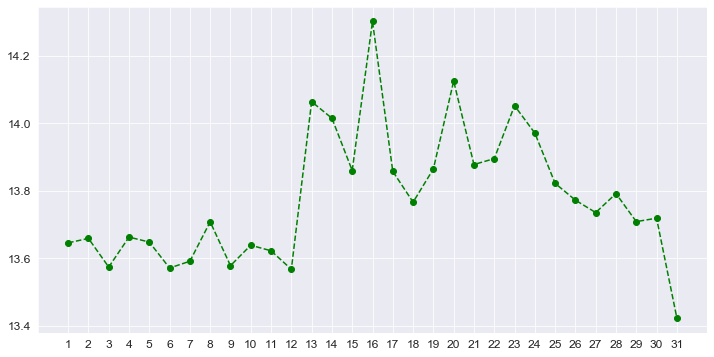

In [54]:
plt.figure(figsize = (12, 6))
plt.plot(df_day['DeathRate'], 'o--g')
plt.xticks(df_day['DeathRate'].index);

#plt.figure(figsize = (12, 6))
#g = sns.barplot(df_day.index, y='DeathRate', data=df_day)
#g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Group by month

In [40]:
df_monthly = df.groupby('Month').sum()
df_monthly.iloc[:, 2:12].head(2)

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Month,,,,,,,,,,
2,552,284,616,560,757,627,146,96,952,0.0
3,251171,50403,300110,386108,645079,78973,63438,68117,714151,0.0


###### Changing the index of month

In [41]:
df_monthly.index=['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept']
df_monthly.iloc[:, 2:12].head()

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Feb,552,284,616,560,757,627,146,96,952,0.0
Mar,251171,50403,300110,386108,645079,78973,63438,68117,714151,0.0
Apr,572569,72171,665120,1912365,2535915,83003,1038551,477714,3874644,13158716.0
May,356551,27358,383909,1851121,2235030,27556,3706270,973585,6914885,58918148.0
Jun,100614,6223,106837,694582,801419,7584,5284972,1028841,7115232,86135311.0


#### Visual Exploration of DataSet by Monthly Recording

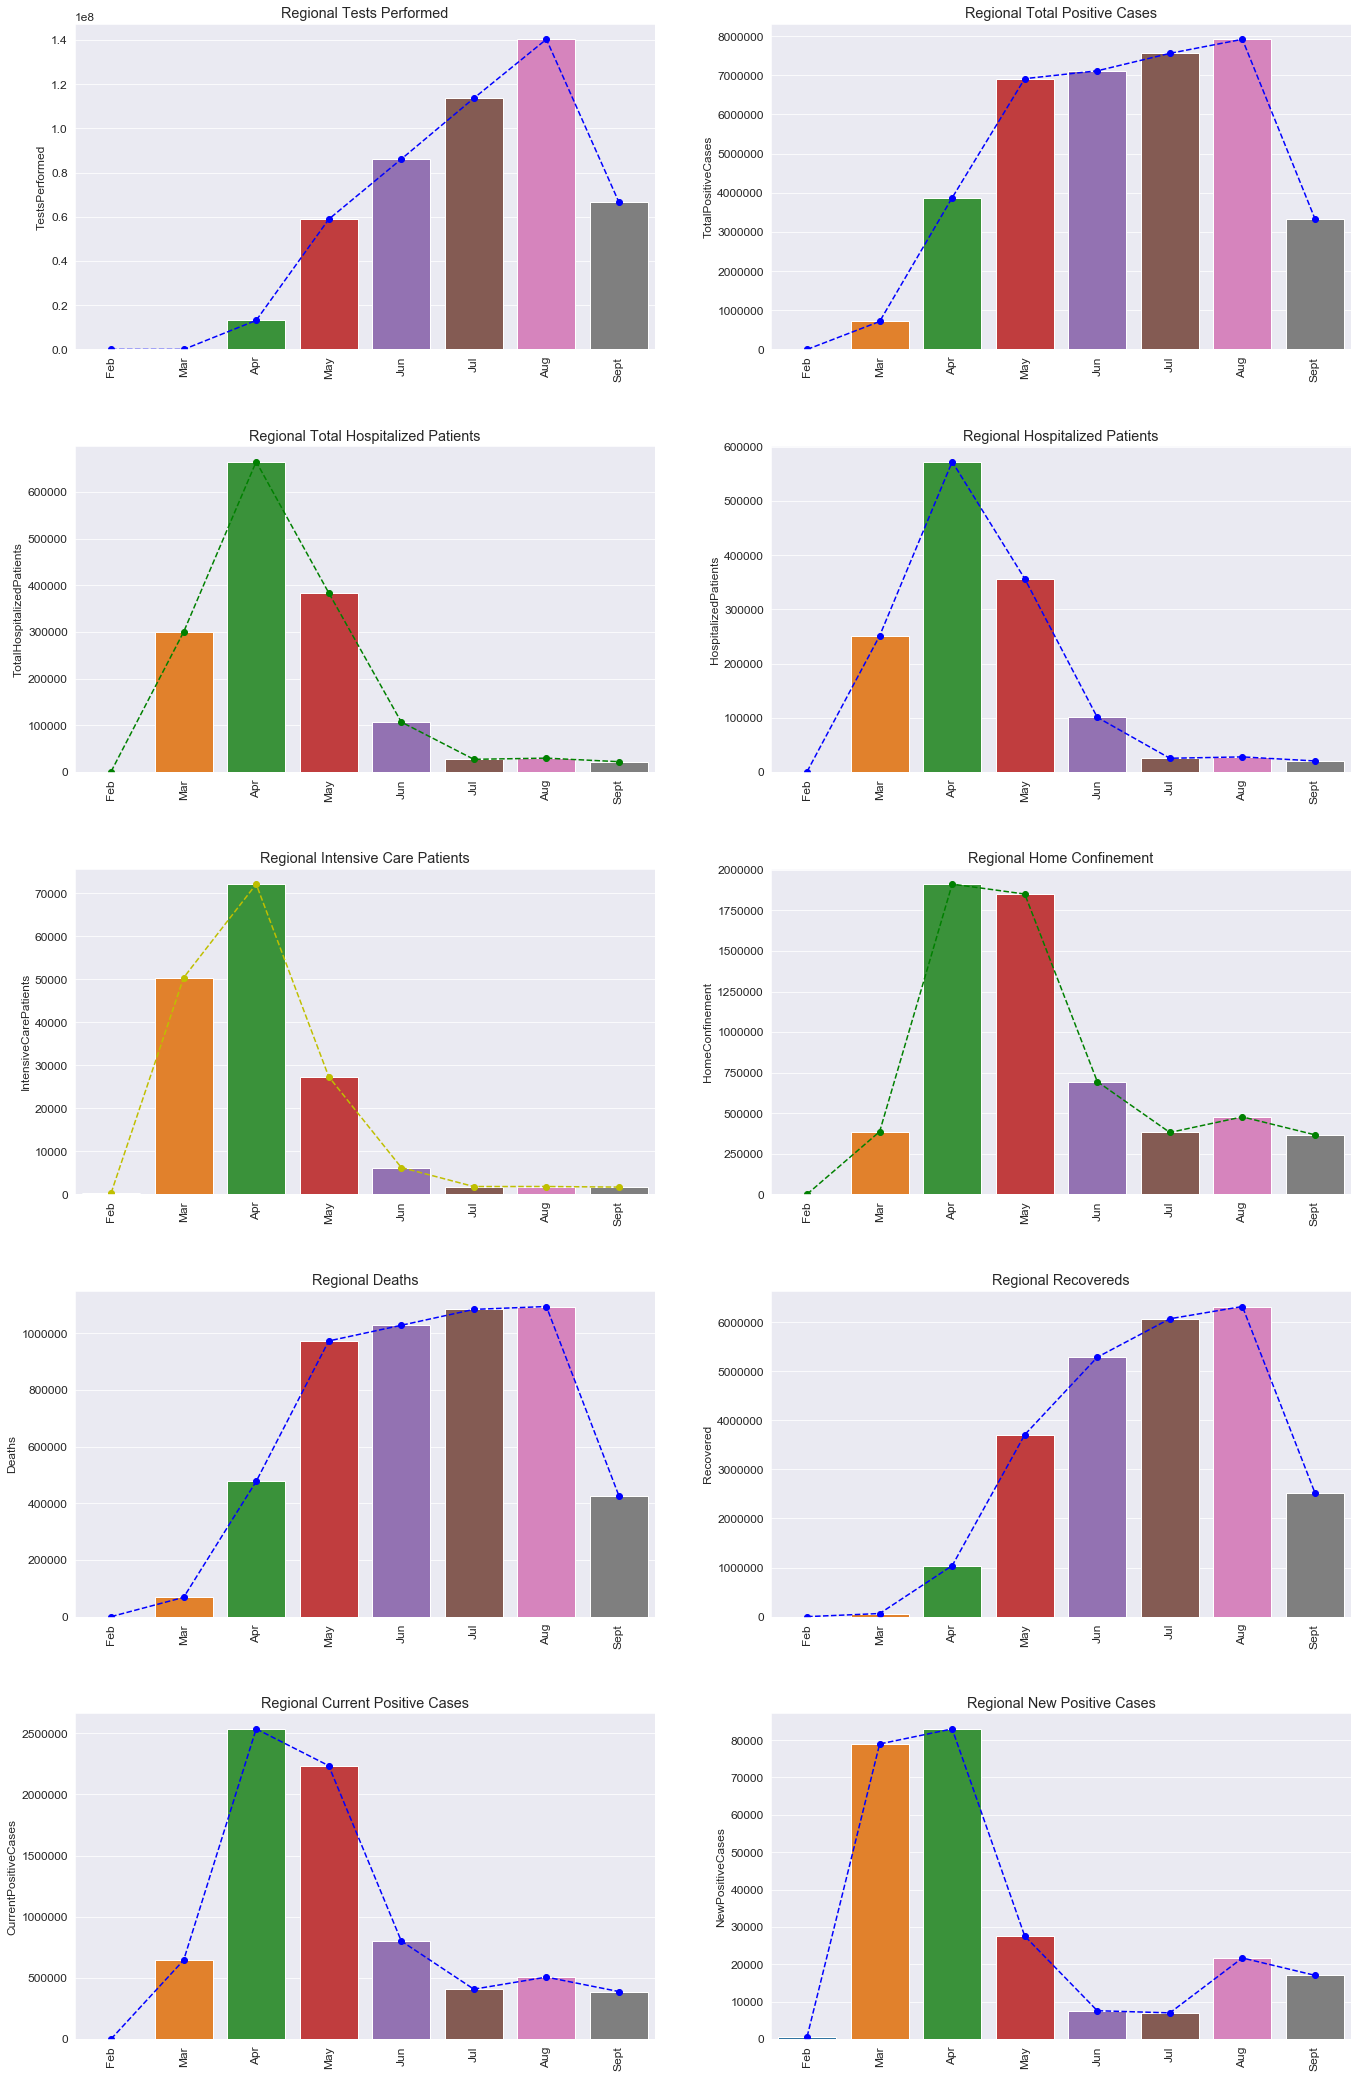

In [42]:
fig, axs = plt.subplots(5, 2, figsize=(20, 30))
sns.set_style('darkgrid')

axs[0,0].set_title('Regional Tests Performed')
axs[0,0].plot(df_monthly['TestsPerformed'], 'o--b')
g = sns.barplot(df_monthly.index, y='TestsPerformed', data=df_monthly, ax=axs[0,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[0,1].set_title('Regional Total Positive Cases')
axs[0,1].plot(df_monthly['TotalPositiveCases'], 'o--b')
g = sns.barplot(df_monthly.index, y='TotalPositiveCases', data=df_monthly, ax=axs[0,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[1,0].set_title('Regional Total Hospitalized Patients')
axs[1,0].plot(df_monthly['TotalHospitalizedPatients'], 'o--g')
g = sns.barplot(df_monthly.index, y='TotalHospitalizedPatients', data=df_monthly, ax=axs[1,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[1,1].set_title('Regional Hospitalized Patients')
axs[1,1].plot(df_monthly['HospitalizedPatients'], 'o--b')
g = sns.barplot(df_monthly.index, y='HospitalizedPatients', data=df_monthly, ax=axs[1,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[2,0].set_title('Regional Intensive Care Patients')
axs[2,0].plot(df_monthly['IntensiveCarePatients'], 'o--y')
g = sns.barplot(df_monthly.index, y='IntensiveCarePatients', data=df_monthly, ax=axs[2,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[2,1].set_title('Regional Home Confinement')
axs[2,1].plot(df_monthly['HomeConfinement'], 'o--g')
g = sns.barplot(df_monthly.index, y='HomeConfinement', data=df_monthly, ax=axs[2,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[3,0].set_title('Regional Deaths')
axs[3,0].plot(df_monthly['Deaths'], 'o--b')
g = sns.barplot(df_monthly.index, y='Deaths', data=df_monthly, ax=axs[3,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[3,1].set_title('Regional Recovereds')
axs[3,1].plot(df_monthly['Recovered'], 'o--b')
g = sns.barplot(df_monthly.index, y='Recovered', data=df_monthly, ax=axs[3,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[4,0].set_title('Regional Current Positive Cases')
axs[4,0].plot(df_monthly['CurrentPositiveCases'], 'o--b')
g = sns.barplot(df_monthly.index, y='CurrentPositiveCases', data=df_monthly, ax=axs[4,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[4,1].set_title('Regional New Positive Cases')
axs[4,1].plot(df_monthly['NewPositiveCases'], 'o--b')
g = sns.barplot(df_monthly.index, y='NewPositiveCases', data=df_monthly, ax=axs[4,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.tight_layout(pad=4);

#### Death Rate per Month

In [43]:
df_monthly['DeathRate'] = (df_monthly['Deaths'] / df_monthly['TotalPositiveCases']) * 100
df_monthly.iloc[:, 12:13].head(2)

,DeathRate
Feb,10.084034
Mar,9.538179


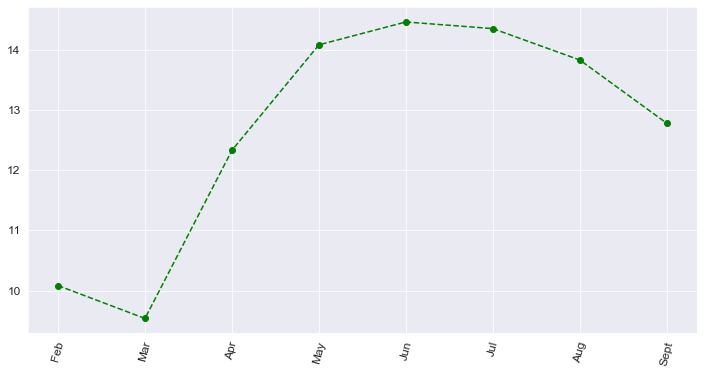

In [55]:
plt.figure(figsize = (12, 6))
plt.plot(df_monthly['DeathRate'], 'o--g')
plt.xticks(df_monthly['DeathRate'].index, rotation=75);

#plt.figure(figsize = (12, 6))
#g = sns.barplot(df_monthly.index, y='DeathRate', data=df_monthly)
#g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Group by week

In [45]:
df_week = df.groupby('Week').mean()
df_week.iloc[:, 2:12].head(2)

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Week,,,,,,,,,,
9,4.931973,2.231293,5.496599,4.884354,7.142857,6.081633,1.557823,0.884354,8.312925,0.0
10,33.666667,12.374150,37.421769,40.775510,60.476190,26.938776,10.646259,7.360544,55.938776,0.0


##### Changing the index of the week

In [46]:
df_week.index=['Week 9', 'Week 10', 'Week 11', 'Week 12', 'Week 13', 'Week 14', 
               'Week 15', 'Week 16', 'Week 17', 'Week 18', 'Week 19', 'Week 20',
               'Week 21', 'Week 22', 'Week 23',  'Week 24', 'Week 25', 'Week 26',
               'Week 27', 'Week 28', 'Week 29', 'Week 30', 'Week 31', 'Week 32', 
               'Week 33', 'Week 34', 'Week 35', 'Week 36', 'Week 37']
df_week.iloc[:, 2:12].head(3)

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Week 9,4.931973,2.231293,5.496599,4.884354,7.142857,6.081633,1.557823,0.884354,8.312925,0.0
Week 10,33.666667,12.374150,37.421769,40.775510,60.476190,26.938776,10.646259,7.360544,55.938776,0.0
Week 11,188.857143,56.523810,213.176871,189.401361,346.659864,86.972789,54.272109,50.700680,377.054422,0.0


#### Visual Exploration of the DataSet by weekly Recordings

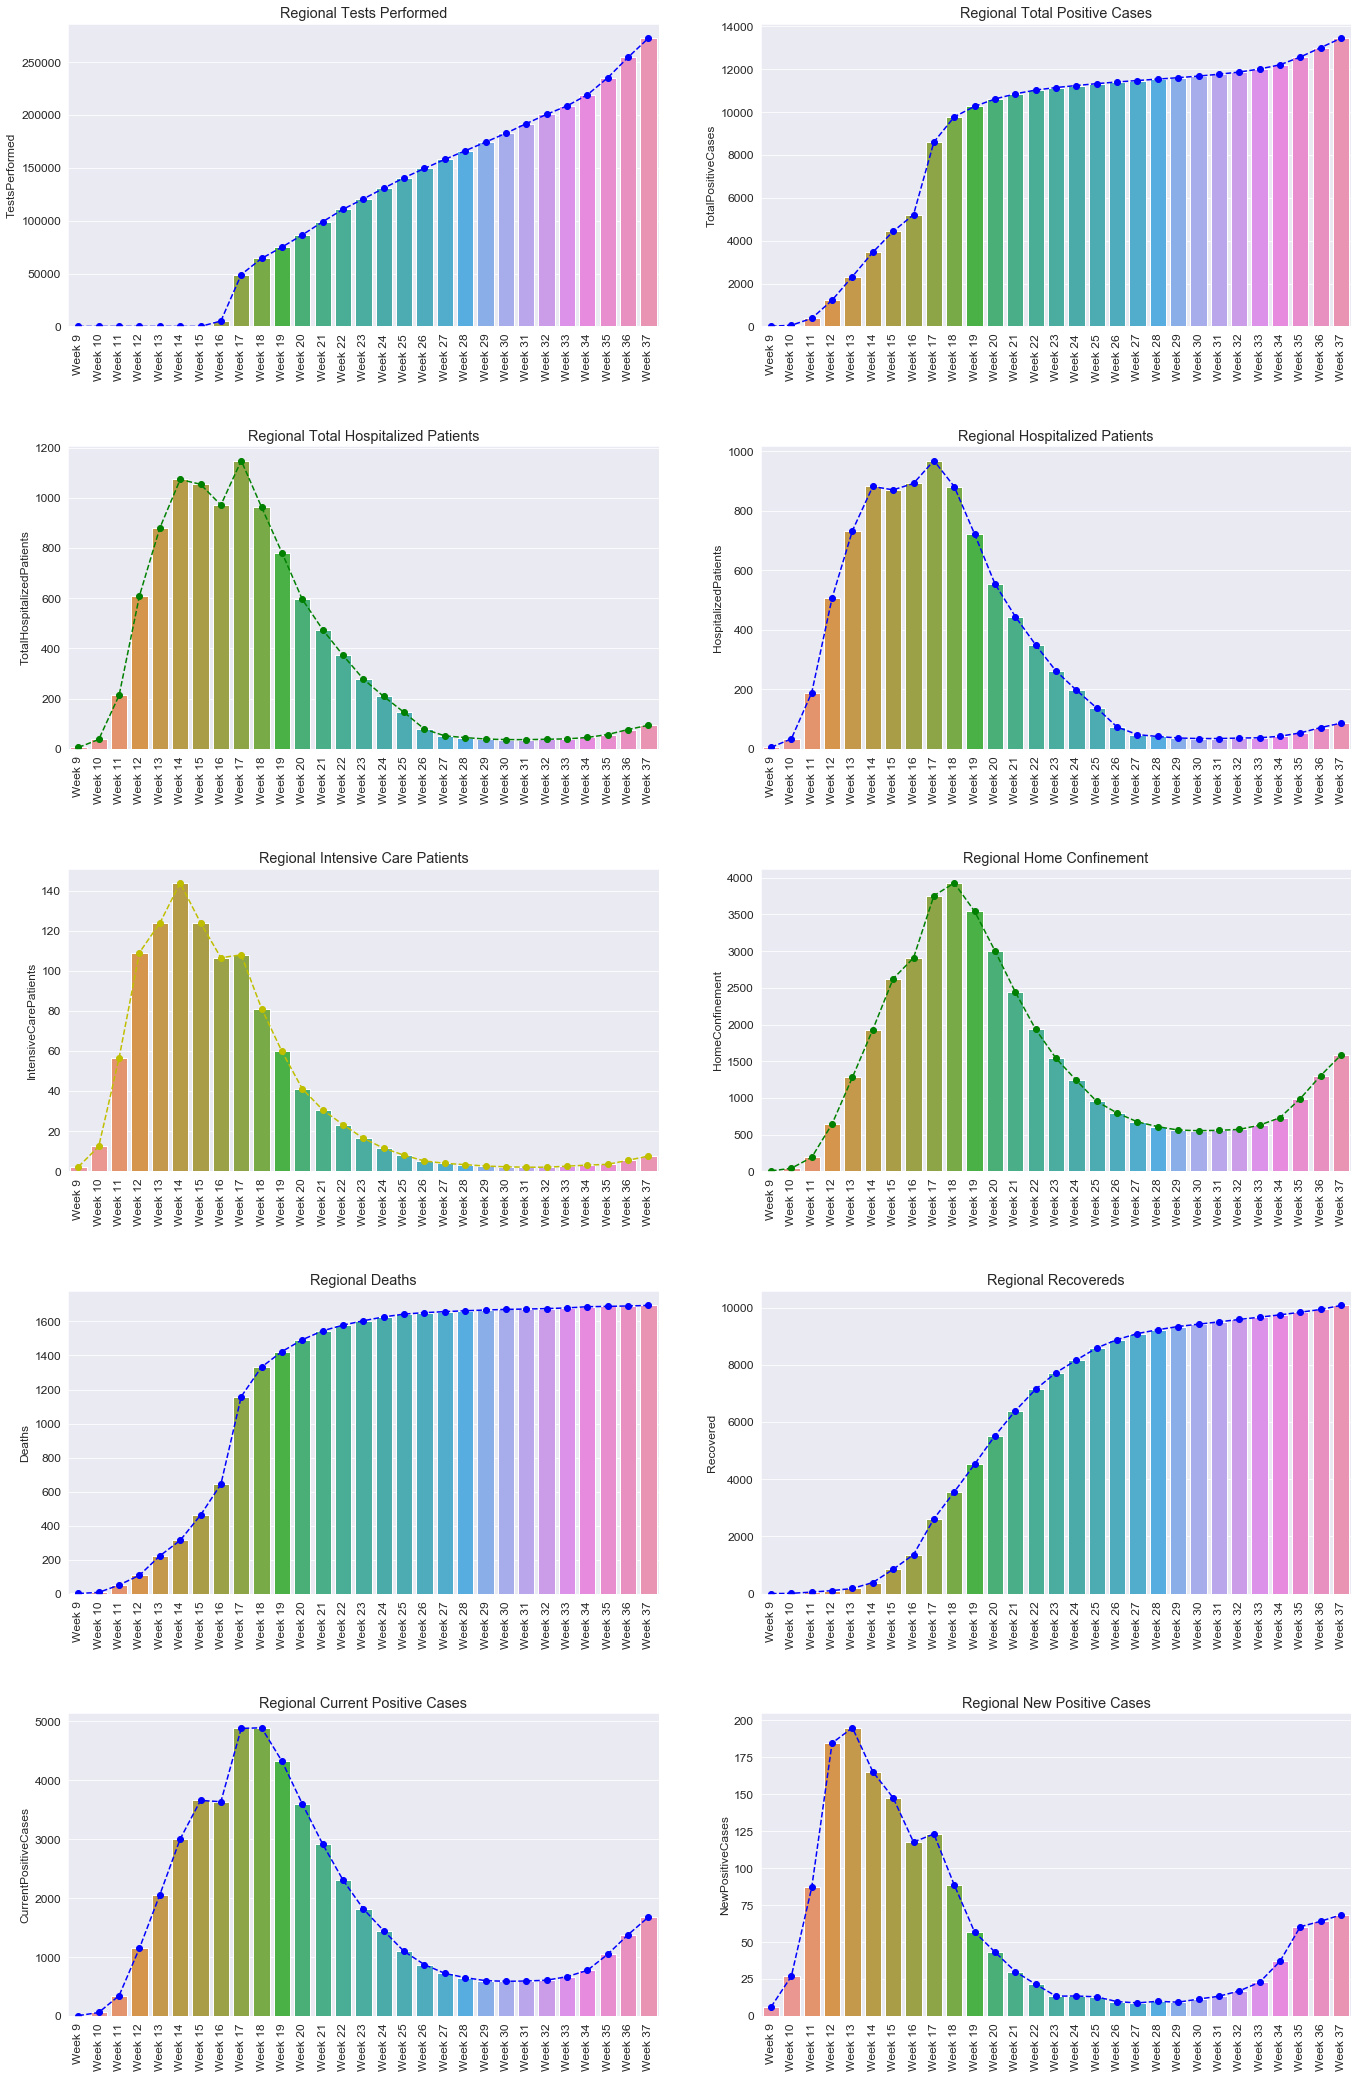

In [47]:
fig, axs = plt.subplots(5, 2, figsize=(20, 30))
sns.set_style('darkgrid')

axs[0,0].set_title('Regional Tests Performed')
axs[0,0].plot(df_week['TestsPerformed'], 'o--b')
g = sns.barplot(df_week.index, y='TestsPerformed', data=df_week, ax=axs[0,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[0,1].set_title('Regional Total Positive Cases')
axs[0,1].plot(df_week['TotalPositiveCases'], 'o--b')
g = sns.barplot(df_week.index, y='TotalPositiveCases', data=df_week, ax=axs[0,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[1,0].set_title('Regional Total Hospitalized Patients')
axs[1,0].plot(df_week['TotalHospitalizedPatients'], 'o--g')
g = sns.barplot(df_week.index, y='TotalHospitalizedPatients', data=df_week, ax=axs[1,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[1,1].set_title('Regional Hospitalized Patients')
axs[1,1].plot(df_week['HospitalizedPatients'], 'o--b')
g = sns.barplot(df_week.index, y='HospitalizedPatients', data=df_week, ax=axs[1,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[2,0].set_title('Regional Intensive Care Patients')
axs[2,0].plot(df_week['IntensiveCarePatients'], 'o--y')
g = sns.barplot(df_week.index, y='IntensiveCarePatients', data=df_week, ax=axs[2,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[2,1].set_title('Regional Home Confinement')
axs[2,1].plot(df_week['HomeConfinement'], 'o--g')
g = sns.barplot(df_week.index, y='HomeConfinement', data=df_week, ax=axs[2,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[3,0].set_title('Regional Deaths')
axs[3,0].plot(df_week['Deaths'], 'o--b')
g = sns.barplot(df_week.index, y='Deaths', data=df_week, ax=axs[3,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[3,1].set_title('Regional Recovereds')
axs[3,1].plot(df_week['Recovered'], 'o--b')
g = sns.barplot(df_week.index, y='Recovered', data=df_week, ax=axs[3,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[4,0].set_title('Regional Current Positive Cases')
axs[4,0].plot(df_week['CurrentPositiveCases'], 'o--b')
g = sns.barplot(df_week.index, y='CurrentPositiveCases', data=df_week, ax=axs[4,0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

axs[4,1].set_title('Regional New Positive Cases')
axs[4,1].plot(df_week['NewPositiveCases'], 'o--b')
g = sns.barplot(df_week.index, y='NewPositiveCases', data=df_week, ax=axs[4,1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.tight_layout(pad=4);

### Death Rate per Week

In [48]:
df_week['DeathRate'] = (df_week['Deaths'] / df_week['TotalPositiveCases']) * 100
df_week['DeathRate'] = df_week['DeathRate'].round(1)
df_week.iloc[:, 12:13].head(2)

,DeathRate
Week 9,10.6
Week 10,13.2


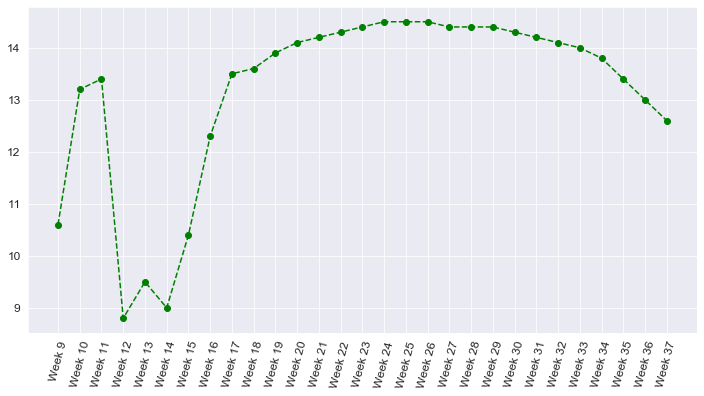

In [56]:
plt.figure(figsize = (12, 6))
plt.plot(df_week['DeathRate'], 'o--g')
plt.xticks(df_week['DeathRate'].index, rotation=75);
#g = sns.barplot(df_week.index, y='DeathRate', data=df_week)
#g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Group by year

In [50]:
df_year = df.groupby('Year').sum()
df_year.iloc[:, 2:12]

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Year,,,,,,,,,,
2020,1354257,161702,1534655,6069406,7520933,243502,25002395,5154993,37438255,478903866.0


#### Death Rate per Year

In [51]:
df_year['DeathRate'] = (df_year['Deaths'] / df_year['TotalPositiveCases']) * 100
df_year.iloc[:, 12:13].head(2)

,DeathRate
Year,
2020,13.76932


In [52]:
#sns.barplot(x = ['HospitalizedPatients', 'IntensiveCarePatients', 'TotalHospitalizedPatients', 'HomeConfinement',
                # 'CurrentPositiveCases', 'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases', 'TestsPerformed'], y = df_year.index)

#yr = sns.countplot(x = (['HospitalizedPatients', 'IntensiveCarePatients']), data=df_year)
    
#ax = sns.countplot(x = ['HospitalizedPatients', 'IntensiveCarePatients', 'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases', 'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases', 'TestsPerformed'], data=df_year)



#sns.countplot(x="variable", data=pd.melt(df_year))